
# Bike Sharing Assignment

## Add comments and change the dummy variable code and make it shotter


## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings 
warnings.filterwarnings("ignore")

## Reading the data

In [2]:
data=pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Viewing no. of rows and columns
data.shape

(730, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Exploratory Data Analysis

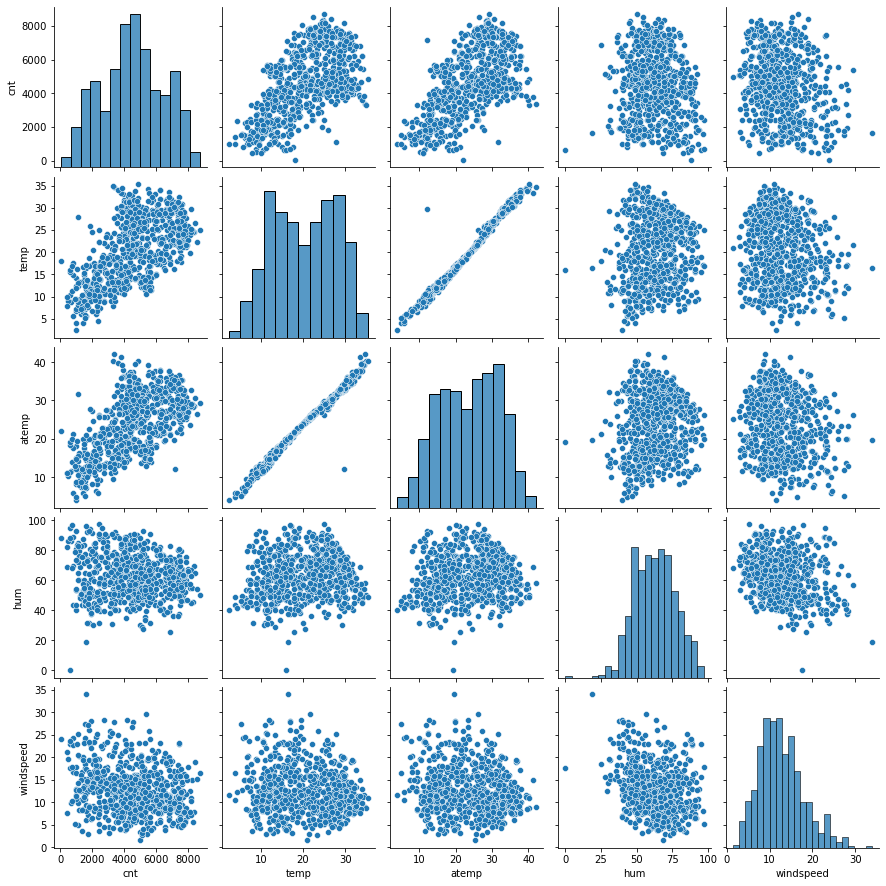

In [5]:
# Pair plot for numeric variables in dataset
sns.pairplot(data,vars=['cnt', 'temp', 'atemp', 'hum', 'windspeed'])
plt.show()

In [6]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
fea_list = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

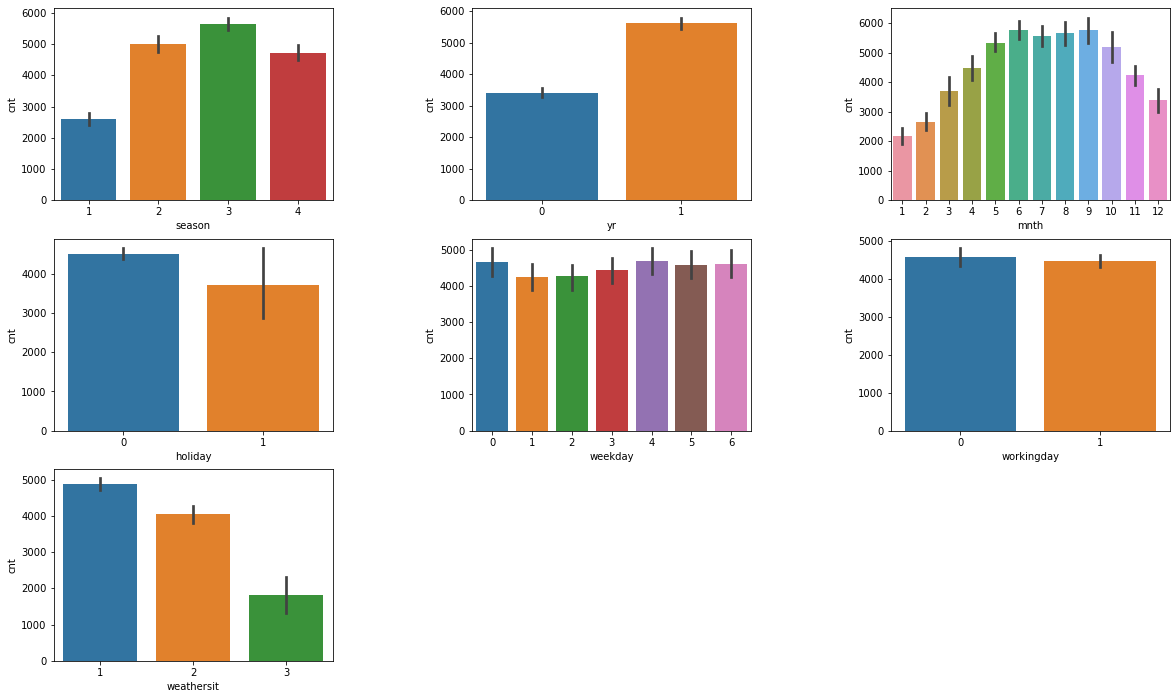

In [8]:
plt.figure(figsize=(20,12))
for i in enumerate(fea_list):
    plt.subplot(3,3,i[0]+1)
    sns.barplot(x =i[1], y = 'cnt', data = data)
    plt.subplots_adjust(hspace=0.2, wspace=0.5)

## Missing Values

In [9]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values in the data

## Dropping columns

In [10]:
data.drop("dteday",axis =1,inplace=True)
data.drop("instant",axis =1,inplace=True)
data.drop("atemp",axis =1,inplace=True)
# Dropping the Casual and registered columns as the cnt column is the sum of casual and registerd columns
data.drop("casual",axis =1,inplace=True)
data.drop("registered",axis =1,inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


Here we are dropping casual and registered columns because the cnt column is the sum of casual and registerd columns

## Dummy variables for the analysis
To convert variables into dummies,we first need to convert variable into object and then apply pd.get_dummies, because get_dummies takes only object type variable

### 1.Season

In [11]:
# Converting int to OBJ
data["season"] = data.season.map({1:"spring",2:"summer",3:"fall",4:"winter"})
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [12]:
data.season.dtypes

dtype('O')

### 2. Month

In [13]:
# Dummy variables for mnth variable
data.mnth = data.mnth.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",
                        7:"Jul",8:"Aug",9:"Sept",10:"Oct",11:"Nov",12:"Dec"})
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,1,1,2,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,2,1,2,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,3,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,4,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,5,1,1,9.305237,43.6957,12.522300,1600


In [14]:
data.mnth.dtypes

dtype('O')

### 3. Weekday

In [15]:
# Dummy variables for weekend variable
data.weekday = data.weekday.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thur",5:"Fri",6:"Sat"})
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,2,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,2,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,1,9.305237,43.6957,12.522300,1600


In [16]:
data.weekday.dtypes

dtype('O')

### 4. Weather Situations

In [17]:
# Dummy variables for weathersit variable
data.weathersit = data.weathersit.map({1:"Clear Sky",2:"Misty",3:"Light Snow and Rain",4:"Thunderstorm"})
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Misty,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Misty,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear Sky,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,Clear Sky,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear Sky,9.305237,43.6957,12.522300,1600


In [18]:
data.weathersit.dtypes

dtype('O')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [20]:
# DUMMIES
season_dummy = pd.get_dummies(data.season,drop_first=True)
season_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [21]:
# concat the dummy column with main datafarme
data = pd.concat([data,season_dummy],axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Mon,1,Misty,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Tue,1,Misty,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Wed,1,Clear Sky,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Thur,1,Clear Sky,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Fri,1,Clear Sky,9.305237,43.6957,12.522300,1600,1,0,0


In [22]:
mnth_dummy = pd.get_dummies(data.mnth,drop_first=True)
mnth_dummy.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [23]:
# concat the dummy column with main datafarme
data = pd.concat([data,mnth_dummy],axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,spring,0,Jan,0,Mon,1,Misty,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Tue,1,Misty,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Wed,1,Clear Sky,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Thur,1,Clear Sky,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear Sky,9.305237,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [24]:
weekday_dummy = pd.get_dummies(data.weekday,drop_first=True)
weekday_dummy.head()

,Mon,Sat,Sun,Thur,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [25]:
# concat the dummy column with main datafarme
data = pd.concat([data,weekday_dummy],axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed
0,spring,0,Jan,0,Mon,1,Misty,14.110847,80.5833,10.749882,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,Jan,0,Tue,1,Misty,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,Wed,1,Clear Sky,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thur,1,Clear Sky,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,Clear Sky,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [26]:
weathersit_dummy = pd.get_dummies(data.weathersit)
weathersit_dummy.head()

,Clear Sky,Light Snow and Rain,Misty
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [27]:
data = pd.concat([data,weathersit_dummy],axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Clear Sky,Light Snow and Rain,Misty
0,spring,0,Jan,0,Mon,1,Misty,14.110847,80.5833,10.749882,...,0,1,0,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,1,Misty,14.902598,69.6087,16.652113,...,0,0,0,0,0,1,0,0,0,1
2,spring,0,Jan,0,Wed,1,Clear Sky,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,1,1,0,0
3,spring,0,Jan,0,Thur,1,Clear Sky,8.200000,59.0435,10.739832,...,0,0,0,0,1,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,Clear Sky,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [28]:
data.shape

(730, 34)

In [29]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'spring', 'summer',
       'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sept', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed', 'Clear Sky',
       'Light Snow and Rain', 'Misty'],
      dtype='object')

## Dropping the main variables after creating dummy variables

In [30]:
data.drop("season",axis =1,inplace=True)
data.drop("mnth",axis =1,inplace=True)
data.drop("weekday",axis =1,inplace=True)
data.drop("weathersit",axis =1,inplace=True)

In [31]:
data.shape

(730, 30)

In [32]:
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Clear Sky,Light Snow and Rain,Misty
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sept', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue',
       'Wed', 'Clear Sky', 'Light Snow and Rain', 'Misty'],
      dtype='object')

## Correlation between the variables

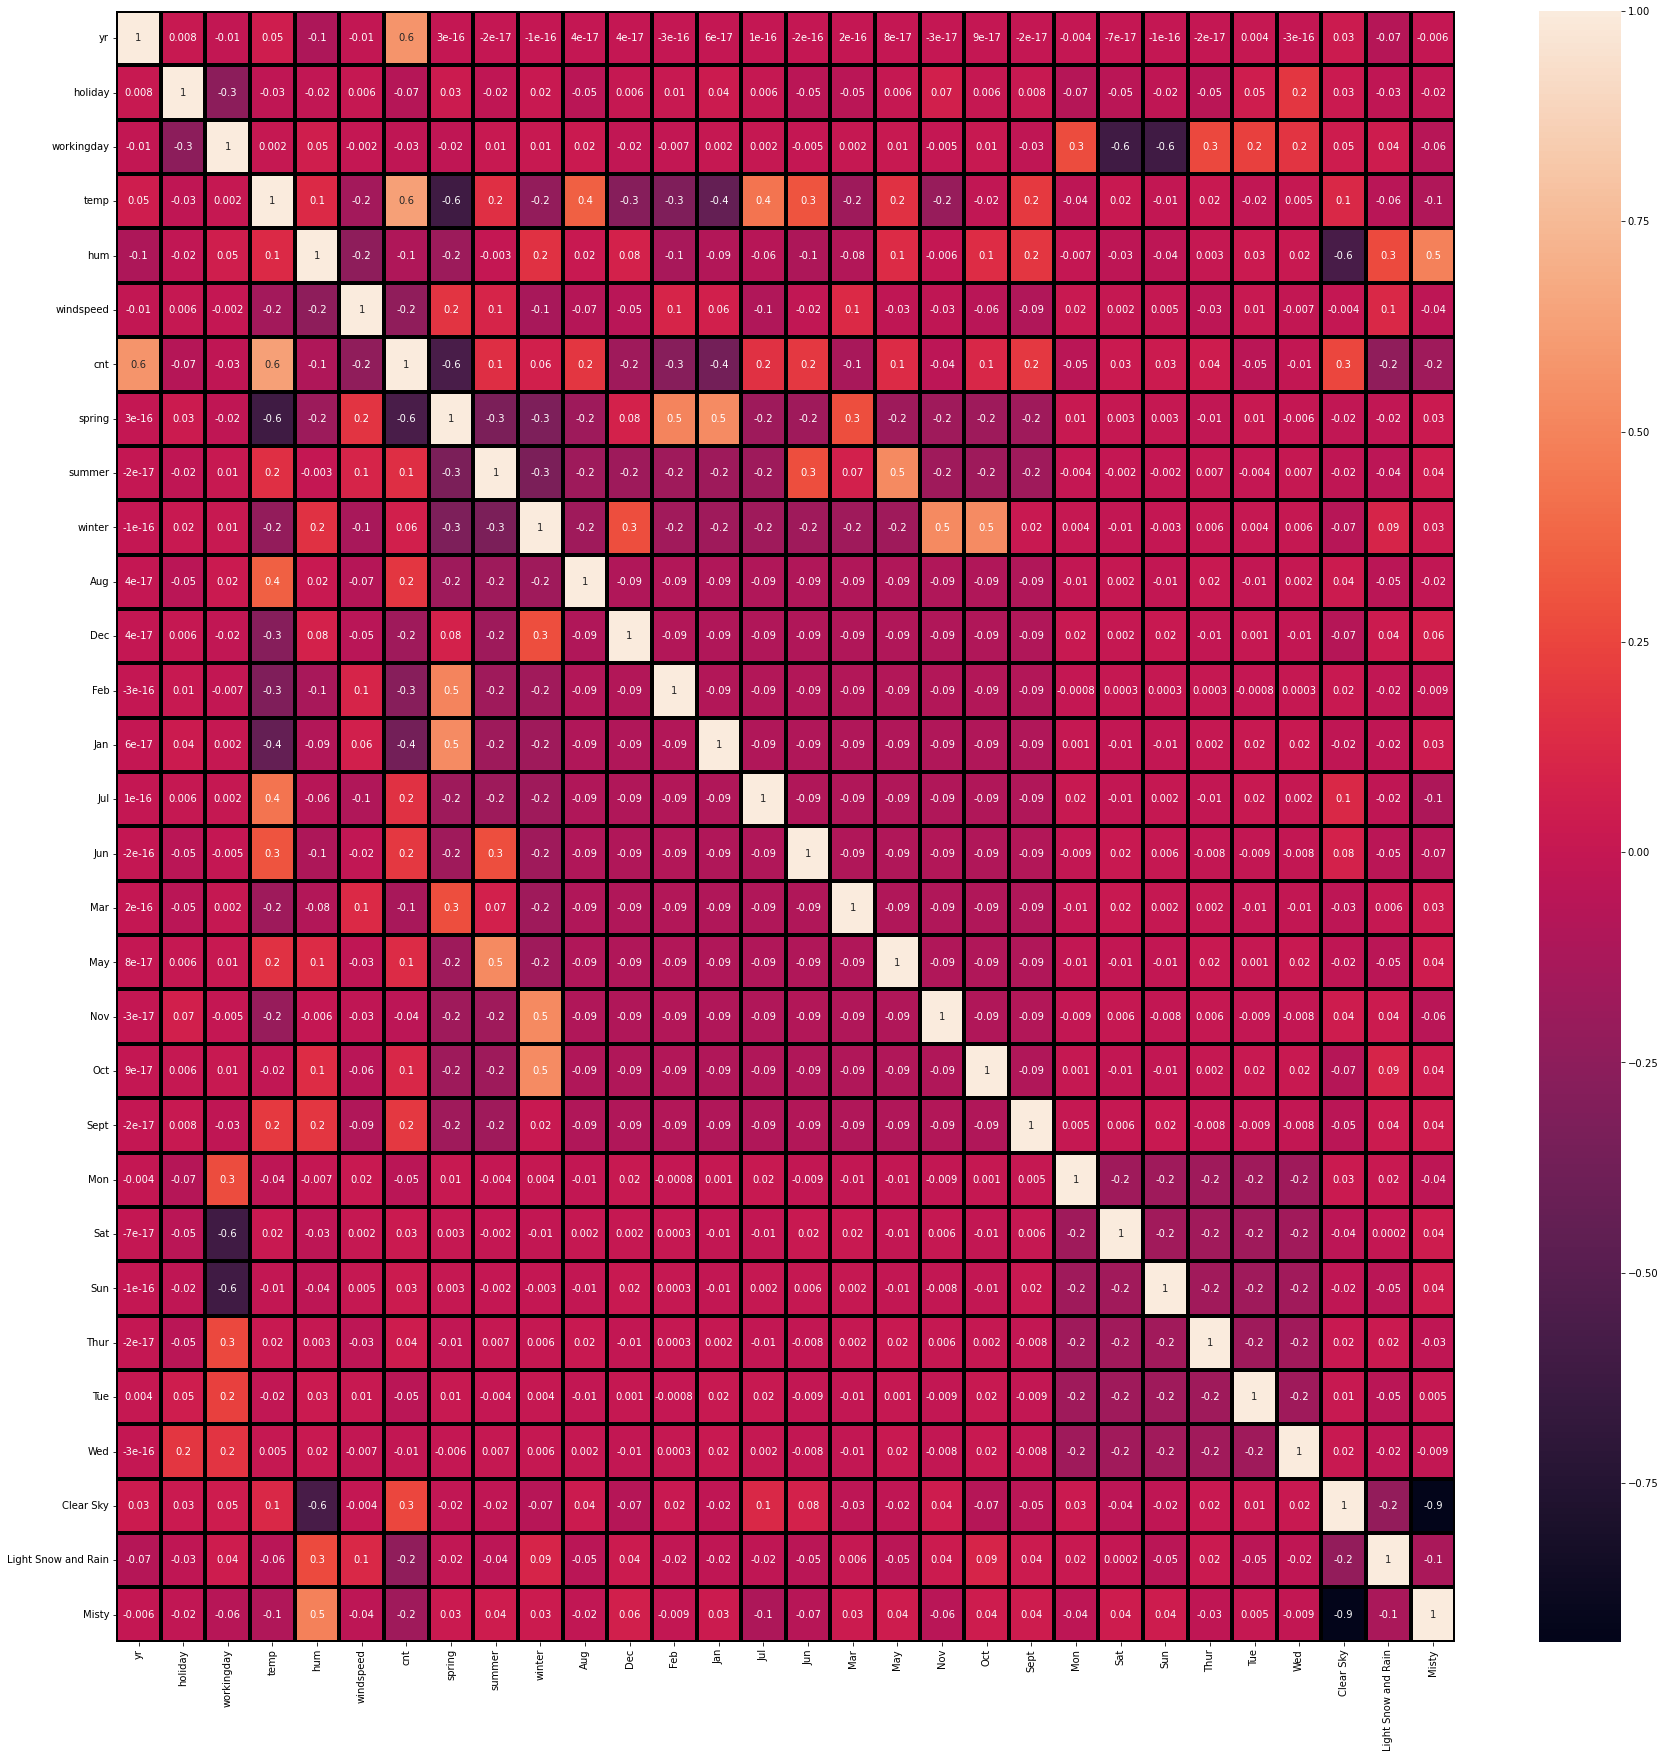

In [34]:
plt.figure(figsize = (30,30))
sns.heatmap(data.corr(),annot=True,fmt='.1g', linewidths=4, linecolor='black')
plt.show()

We can observe that the correlation of target variable with other variables is not high. So we can keep all the variables

## Train Test Split

In [35]:
df_train,df_test = train_test_split(data,train_size=0.70,random_state=42)

In [36]:
df_train.shape

(510, 30)

In [37]:
df_test.shape

(220, 30)

## Scaling the data
We are scaling the numeric data to make sure all the values are in one range i.e.[0 to 1] StandardScaler or [-1 to 1] MinMaxscalar

In [38]:
# MinMax Scaling
# 1. Initiating the scaler method
scaler=MinMaxScaler()
numlist=["temp","hum","windspeed","cnt"]
# 2. Fit the scaled data onto main data
df_train[numlist] = scaler.fit_transform(df_train[numlist])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Clear Sky,Light Snow and Rain,Misty
645,1,1,0,0.403972,0.731215,0.419004,0.609320,0,0,1,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.509660,0.708724,0.554026,0,1,0,...,0,0,0,0,0,0,1,1,0,0
360,0,0,1,0.331287,0.785745,0.415925,0.088253,1,0,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.817947,0.110593,0.862127,0,0,1,...,0,0,0,0,1,0,0,0,0,1
625,1,0,1,0.703024,0.899098,0.839562,0.439696,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [39]:
# X_train and y_train
y_train = df_train.pop("cnt")
X_train = df_train

## Building the model using Recursive feature elimination (RFE)

In [40]:
# Importing libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator = lm, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 14),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 10),
 ('winter', True, 1),
 ('Aug', False, 12),
 ('Dec', True, 1),
 ('Feb', False, 11),
 ('Jan', False, 15),
 ('Jul', True, 1),
 ('Jun', False, 18),
 ('Mar', False, 3),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 5),
 ('Sept', False, 2),
 ('Mon', False, 7),
 ('Sat', False, 16),
 ('Sun', False, 13),
 ('Thur', False, 17),
 ('Tue', False, 9),
 ('Wed', False, 8),
 ('Clear Sky', True, 1),
 ('Light Snow and Rain', True, 1),
 ('Misty', False, 6)]

In [43]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'Dec',
       'Jul', 'Nov', 'Clear Sky', 'Light Snow and Rain'],
      dtype='object')

In [44]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'Aug', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Oct',
       'Sept', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed', 'Misty'],
      dtype='object')

## Building Model using Statsmodel for manual elimination of variables

### Calculating Model 1

In [45]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [46]:
# Adding a constant variable  
X_train_rfec = sm.add_constant(X_train_rfe)

In [47]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfec).fit()   

In [48]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.8
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          7.39e-185
Time:                        12:14:51   Log-Likelihood:                 474.72
No. Observations:                 510   AIC:                            -923.4
Df Residuals:                     497   BIC:                            -868.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2840    

In [49]:
# Calculate the variance inflation factor(VIF)s for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,19.13
3,hum,18.93
4,windspeed,5.13
10,Clear Sky,3.20
5,spring,2.91
6,winter,2.76
0,yr,2.08
9,Nov,1.83
8,Jul,1.43
7,Dec,1.36


In [50]:
# P value is <0.05 and Vif is greater that 5, removing hum
X_train_new = X_train_rfe.drop(["hum"],axis =1)
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter', 'Dec', 'Jul',
       'Nov', 'Clear Sky', 'Light Snow and Rain'],
      dtype='object')

In [51]:
# Calculate the VIFs for the model again
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.74
3,windspeed,4.99
9,Clear Sky,2.82
5,winter,2.33
0,yr,2.08
4,spring,1.82
8,Nov,1.79
7,Jul,1.36
6,Dec,1.30
10,Light Snow and Rain,1.12


### Calculating Model 2

In [54]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_new)

In [55]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [56]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.6
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          4.79e-183
Time:                        12:15:34   Log-Likelihood:                 467.62
No. Observations:                 510   AIC:                            -911.2
Df Residuals:                     498   BIC:                            -860.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1716    

In [57]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.74
3,windspeed,4.99
9,Clear Sky,2.82
5,winter,2.33
0,yr,2.08
4,spring,1.82
8,Nov,1.79
7,Jul,1.36
6,Dec,1.30
10,Light Snow and Rain,1.12


Here the temp is an important varibale so I am trying to drop next variable in the order i.e "windspeed" because it is closest to 5

In [58]:
X_train_new = X_train_new.drop(["windspeed"],axis =1)
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'spring', 'winter', 'Dec', 'Jul', 'Nov',
       'Clear Sky', 'Light Snow and Rain'],
      dtype='object')

### Calculating Model 3

In [59]:
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     232.0
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          1.89e-180
Time:                        12:15:35   Log-Likelihood:                 458.65
No. Observations:                 510   AIC:                            -895.3
Df Residuals:                     499   BIC:                            -848.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1117    

In [60]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.58
8,Clear Sky,2.80
4,winter,2.32
0,yr,2.06
7,Nov,1.75
3,spring,1.41
6,Jul,1.32
5,Dec,1.30
9,Light Snow and Rain,1.08
1,holiday,1.04


Since all the p-values and VIF values are in the range, these let over variables are preferred

## Residual Analysis of the train data

In [61]:
# Prediction
y_train_pred = lm.predict(X_train_rfe)

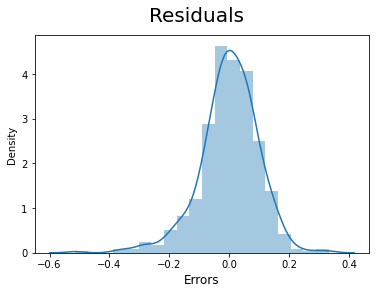

In [62]:
#Plotting distplot for residuals
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Residuals', fontsize = 20) 
plt.xlabel('Errors', fontsize = 12)
plt.show()

## Prediction Analysis

In [63]:
# MinMax Scaling
numlist=["temp","hum","windspeed","cnt"]
# We transform the data on a test data
# Transform on data
df_test[numlist] = scaler.transform(df_test[numlist])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Clear Sky,Light Snow and Rain,Misty
468,1,0,0,0.543115,0.518248,0.422104,0.848606,0,1,0,...,0,0,0,1,0,0,0,1,0,0
148,0,0,1,0.758058,0.843709,0.479765,0.526017,0,1,0,...,0,0,0,0,0,1,0,1,0,0
302,0,0,1,0.324018,0.642765,0.386287,0.350115,0,0,1,...,0,0,0,0,0,1,0,1,0,0
355,0,0,0,0.453814,0.780592,0.062325,0.318363,1,0,0,...,0,0,1,0,0,0,0,0,0,1
515,1,0,1,0.773634,0.507943,0.433030,0.833877,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [64]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Clear Sky,Light Snow and Rain,Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.454545,0.031818,0.672727,0.526557,0.629591,0.435018,0.480125,0.281818,0.236364,0.231818,...,0.063636,0.131818,0.140909,0.163636,0.159091,0.113636,0.163636,0.654545,0.027273,0.318182
std,0.499065,0.175916,0.470288,0.229808,0.152237,0.212390,0.232713,0.450911,0.425817,0.422956,...,0.244661,0.339064,0.348721,0.370789,0.366595,0.318093,0.370789,0.476601,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.047675,0.193646,0.060760,-0.049378,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.324018,0.521081,0.281540,0.287849,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.505733,0.609274,0.414837,0.472957,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.725609,0.734893,0.533519,0.639291,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.970925,1.002146,1.214955,0.980804,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
# Creating X_test and y_test variables
y_test = df_test.pop('cnt')
X_test = df_test

In [66]:
# Now let's use my model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
# Adding a constant variable 
X_test_new = sm.add_constant(X_test)
X_test_new.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Clear Sky,Light Snow and Rain,Misty
468,1.0,1,0,0,0.543115,0.518248,0.422104,0,1,0,...,0,0,0,1,0,0,0,1,0,0
148,1.0,0,0,1,0.758058,0.843709,0.479765,0,1,0,...,0,0,0,0,0,1,0,1,0,0
302,1.0,0,0,1,0.324018,0.642765,0.386287,0,0,1,...,0,0,0,0,0,1,0,1,0,0
355,1.0,0,0,0,0.453814,0.780592,0.062325,1,0,0,...,0,0,1,0,0,0,0,0,0,1
515,1.0,1,0,1,0.773634,0.507943,0.433030,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [67]:
# Creating variables which are present in train dataset
X_test_new = X_test[X_train_new.columns]
X_test_new.head()

,yr,holiday,temp,spring,winter,Dec,Jul,Nov,Clear Sky,Light Snow and Rain
468,1,0,0.543115,0,0,0,0,0,1,0
148,0,0,0.758058,0,0,0,0,0,1,0
302,0,0,0.324018,0,1,0,0,0,1,0
355,0,0,0.453814,1,0,1,0,0,0,0
515,1,0,0.773634,0,0,0,0,0,1,0


In [68]:
# Adding a constant to test dataset 
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,yr,holiday,temp,spring,winter,Dec,Jul,Nov,Clear Sky,Light Snow and Rain
468,1.0,1,0,0.543115,0,0,0,0,0,1,0
148,1.0,0,0,0.758058,0,0,0,0,0,1,0
302,1.0,0,0,0.324018,0,1,0,0,0,1,0
355,1.0,0,0,0.453814,1,0,1,0,0,0,0
515,1.0,1,0,0.773634,0,0,0,0,0,1,0


In [69]:
# Predicting variables used in final model buiding
y_test_pred = lm.predict(X_test_new)
y_test_pred

468    0.679786
148    0.533330
302    0.435447
355    0.092992
515    0.782790
         ...   
532    0.734072
558    0.664282
137    0.385033
314    0.272474
683    0.504503
Length: 220, dtype: float64

In [70]:
# Calculate r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)


0.8109184727426908

In [71]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)
mse

0.010193230240142145

### Here we can observe that the R2 value for train data is 82.3% and for test data is 81%
### The mean square error is also very low at 1.01%

## Model Evaluation

Text(0, 0.5, 'y_pred')

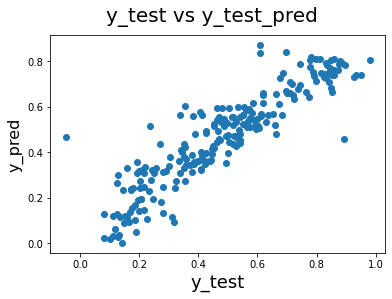

In [72]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)  

- Here we can observe that the plot is linear and has a strong correlation with prediction and test datas

In [73]:
# Checking the co-efficients of the variables for the respective independent variables
coeff = lm.params
coeff.sort_values(ascending = False)

temp                   0.446836
yr                     0.242500
const                  0.111727
winter                 0.096061
Clear Sky              0.082876
Jul                   -0.064399
Dec                   -0.069621
holiday               -0.073797
Nov                   -0.091960
spring                -0.151894
Light Snow and Rain   -0.197939
dtype: float64

## Conclusion point for the bike sharing data

From the about data, we can observe that 
- Temp variable has the highest co-efficient
- Light Snow and Rain variable has the lowest co-efficient
- The demand of bikes reduce in Spring season, when there is snow and rain and during holidays